In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lolid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lolid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# load the dataset
news_d = pd.read_csv("train.tsv", sep='\t')

In [6]:
print("Shape of News data:", news_d.shape)
print("News data columns", news_d.columns)

Shape of News data: (5758, 2)
News data columns Index(['title', 'is_fake'], dtype='object')


In [7]:
# by using df.head(), we can immediately familiarize ourselves with the dataset. 
news_d.head()

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


In [8]:
title_length = news_d.title.str.split().str.len()
title_length.describe()

count    5758.000000
mean        8.723689
std         2.810851
min         3.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        37.000000
Name: title, dtype: float64

1: Unreliable
0: Reliable
Distribution of labels:
1    2879
0    2879
Name: is_fake, dtype: int64


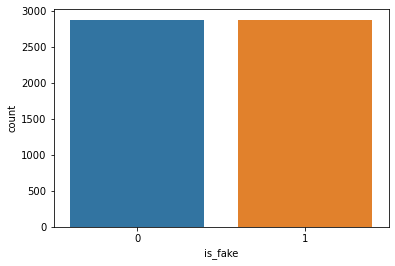

In [11]:
sns.countplot(x="is_fake", data=news_d)
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(news_d.is_fake.value_counts())

In [13]:
print(round(news_d.is_fake.value_counts(normalize=True),2)*100)

1    50.0
0    50.0
Name: is_fake, dtype: float64


In [17]:
news_d.isnull().count()

title      5758
is_fake    5758
dtype: int64

Data Cleaning for Analysis

In [14]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [18]:
ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('russian')
stopwords_dict = Counter(stop_words)

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    # text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [20]:
news_d["title"] = news_d.title.apply(nltk_preprocess)

In [21]:
news_d.head()

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт вмешате...,1
1,Агент Кокорина назвал езду встречке житейской ...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело недоносительстве...,1


In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [24]:
# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined